In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from IPython.display import Video
from matplotlib import animation

In [2]:
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import Euler.Periodic_2D as elr

# Non-Conservative Form

In this notebook, we try to solve the 2D shallow water equations using Euler explicit and Leap Frog methods. We begin with an unstaggered grid first. The 2D SWE in the non-conservative form are given as follows:

$$ \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} - fv = - g \frac{\partial h}{\partial x} $$

$$ \frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} + fu = - g \frac{\partial h}{\partial y} $$

$$ \frac{\partial h}{\partial t} + \frac{\partial (uh)}{\partial x} + \frac{\partial (vh)}{\partial y} = 0$$

In [3]:
#Defining necessary constants

g = 9.81
r0 = 6.378*10**6
day = 24*60*60
omega = 2*np.pi / day
f = 2*omega*np.sin(np.deg2rad(30))

In [4]:
Lx, Ly = 6, 6
nx, ny = 200, 200
dx, dy = Lx/nx, Ly/ny

x = np.linspace(-Lx/2, Lx/2, nx+1, dtype = float)
y = np.linspace(-Ly/2, Ly/2, ny+1, dtype = float)
X, Y = np.meshgrid(x, y)

In [5]:
um_old = np.zeros((nx+1, ny+1))
um_new = np.zeros((nx+1, ny+1))
vm_old = np.zeros((nx+1, ny+1))
vm_new = np.zeros((nx+1, ny+1))

hm_old = 1 + 0.01*np.exp(-10*(X**2 + Y**2))
hm_old_t0 = 1 + 0.01*np.exp(-10*(X**2 + Y**2))
hm_new = np.zeros((nx+1, ny+1))

t_start = 0
t_end = 2
dt = 0.0005

for t in np.arange(t_start,t_end,dt):
    
    # Governing equations for interior points
    um_new = um_old - dt*elr.adv_x(um_old, um_old, dx, nx+1) - dt*elr.adv_y(vm_old, um_old, dy, ny+1) + dt*f*vm_old - dt*g*elr.partial_x_cd(hm_old, dx, nx)
    vm_new = vm_old - dt*elr.adv_x(um_old, vm_old, dx, nx+1) - dt*elr.adv_y(vm_old, vm_old, dy, ny+1) - dt*f*um_old - dt*g*elr.partial_y_cd(hm_old, dy, ny)
    hm_new = hm_old - dt*elr.partial_x_cd(um_old*hm_old, dx, nx) - dt*elr.partial_y_cd(vm_old*hm_old, dx, nx)
    
    hm_old = hm_new
    um_old = um_new
    vm_old = vm_new

In [6]:
X_plot = np.zeros((21,21))
Y_plot = np.zeros((21,21))
hm_plot = np.zeros((21,21))
cx = 0
cy = 0
for numx in np.linspace(0,nx,21):
    cy = 0
    i = int(numx)
    for numy in np.linspace(0,ny,21):
        j = int(numy)
        X_plot[cx,cy] = X[i,j]
        Y_plot[cx,cy] = Y[i,j]
        hm_plot[cx,cy] = hm_new[i,j]
        cy = cy + 1
    cx = cx + 1

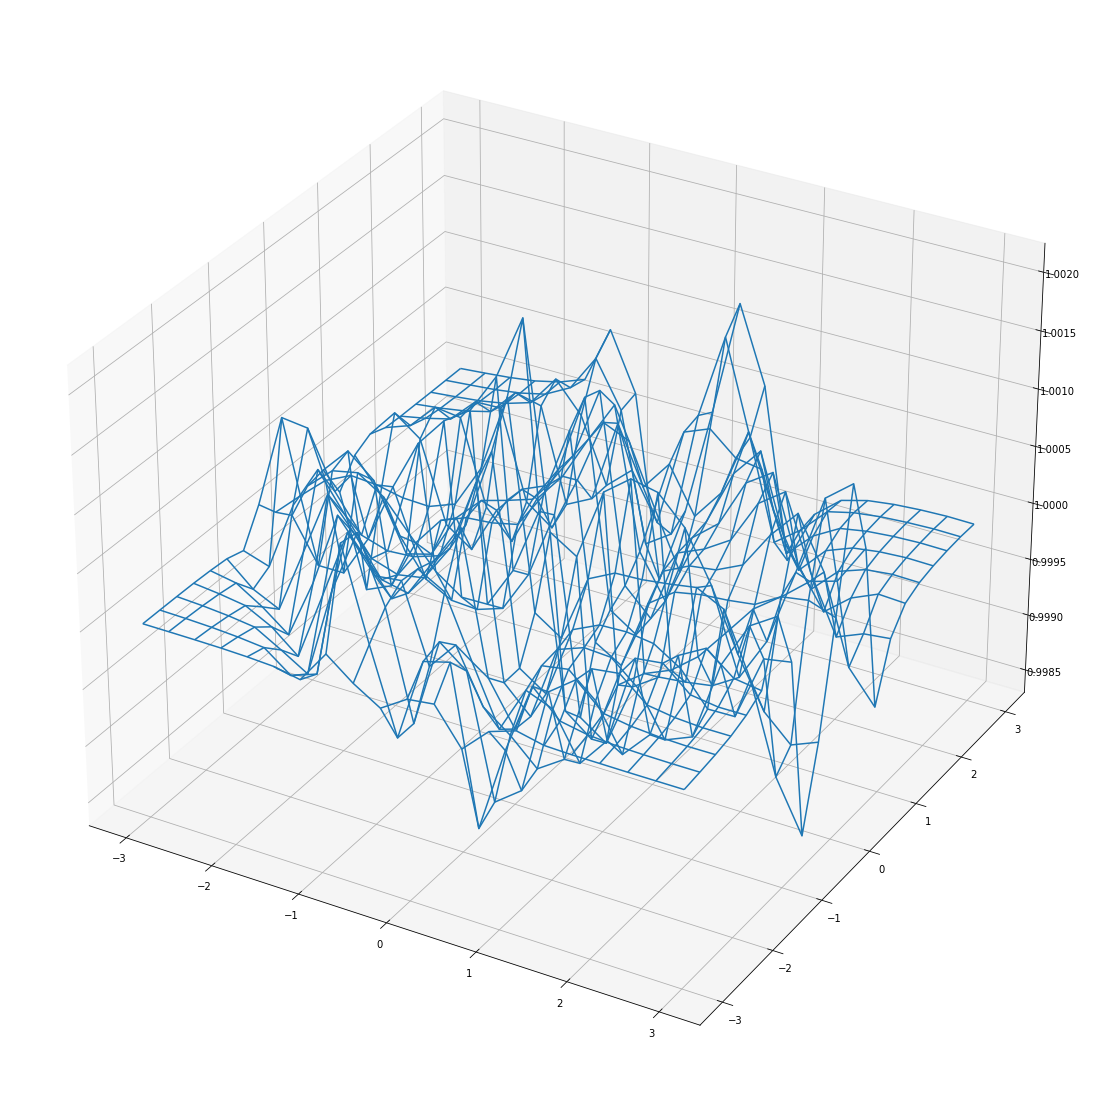

In [7]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (20,20))
ax = plt.axes(projection='3d')
#s = ax.contour3D(X_plot, Y_plot, hm_plot)
s = ax.plot_wireframe(X_plot, Y_plot, hm_plot)
#plt.colorbar(s, ax = ax)

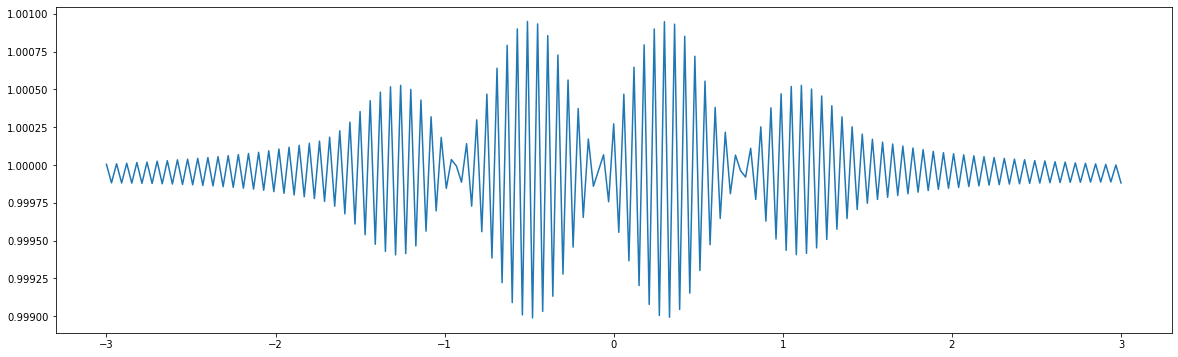

In [8]:
plt.figure(figsize = (20,6))
plt.plot(x,hm_new[:,9])

## Unstaggered grid with leap frog

In [9]:
Lx, Ly = 6, 6
nx, ny = 200, 200
dx, dy = Lx/nx, Ly/ny

x = np.linspace(-Lx/2, Lx/2, nx+1, dtype = float)
y = np.linspace(-Ly/2, Ly/2, ny+1, dtype = float)
X, Y = np.meshgrid(x, y)

In [10]:
um_older = np.zeros((nx+1, ny+1))
um_old = np.zeros((nx+1, ny+1))
um_new = np.zeros((nx+1, ny+1))
vm_older = np.zeros((nx+1, ny+1))
vm_old = np.zeros((nx+1, ny+1))
vm_new = np.zeros((nx+1, ny+1))

hm_older = np.zeros((nx, ny))
hm_old = 1 + 0.01*np.exp(-100*(X**2 + Y**2))
hm_old_t0 = 1 + 0.01*np.exp(-100*(X**2 + Y**2))
hm_new = np.zeros((nx, ny))

t_start = 0
t_end = 1
dt = 0.0005

count = 0

for t in np.arange(t_start,t_end,dt):
    
    # Governing equations
    if(count == 0):
        um_new = um_old - dt*elr.adv_x(um_old, um_old, dx, nx+1) - dt*elr.adv_y(vm_old, um_old, dy, ny+1) + dt*f*vm_old - dt*g*elr.partial_x_cd(hm_old, dx, nx)
        vm_new = vm_old - dt*elr.adv_x(um_old, vm_old, dx, nx+1) - dt*elr.adv_y(vm_old, vm_old, dy, ny+1) - dt*f*um_old - dt*g*elr.partial_y_cd(hm_old, dy, ny)
        hm_new = hm_old - dt*elr.partial_x_cd(um_old*hm_old, dx, nx) - dt*elr.partial_y_cd(vm_old*hm_old, dx, nx)
    else:
        um_new = um_older - 2*dt*(elr.adv_x(um_old, um_old, dx, nx+1) + elr.adv_y(vm_old, um_old, dy, ny+1) - f*vm_old + g*elr.partial_x_cd(hm_old, dx, nx))
        vm_new = vm_older - 2*dt*(elr.adv_x(um_old, vm_old, dx, nx+1) + dt*elr.adv_y(vm_old, vm_old, dy, ny+1) + dt*f*um_old + dt*g*elr.partial_y_cd(hm_old, dy, ny))
        hm_new = hm_older - 2*dt*(elr.partial_x_cd(um_old*hm_old, dx, nx) + elr.partial_y_cd(vm_old*hm_old, dx, nx))
    
    hm_older = hm_old
    um_older = um_old
    vm_older = vm_old
    
    hm_old = hm_new
    um_old = um_new
    vm_old = vm_new

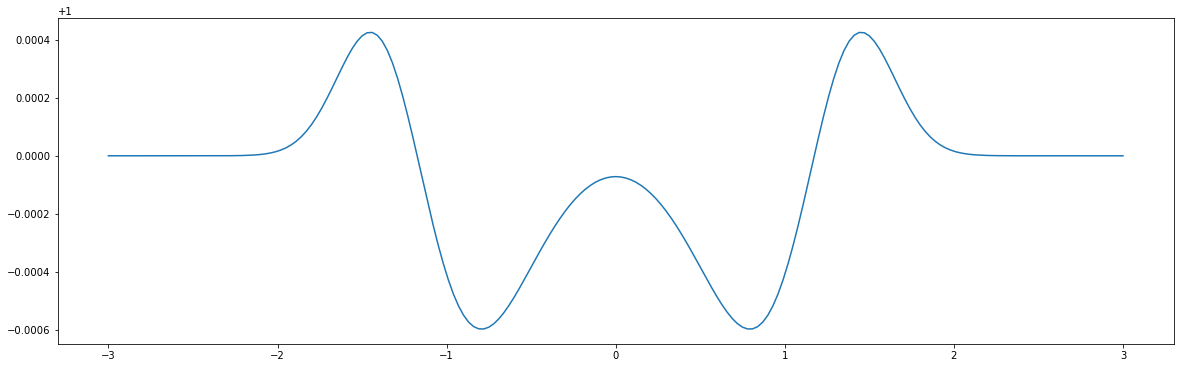

In [11]:
plt.figure(figsize = (20,6))
plt.plot(x,hm_new[:,9])

In [12]:
X_plot = np.zeros((21,21))
Y_plot = np.zeros((21,21))
hm_plot = np.zeros((21,21))
cx = 0
cy = 0
for numx in np.linspace(0,nx,21):
    cy = 0
    i = int(numx)
    for numy in np.linspace(0,ny,21):
        j = int(numy)
        X_plot[cx,cy] = X[i,j]
        Y_plot[cx,cy] = Y[i,j]
        hm_plot[cx,cy] = hm_new[i,j]
        cy = cy + 1
    cx = cx + 1

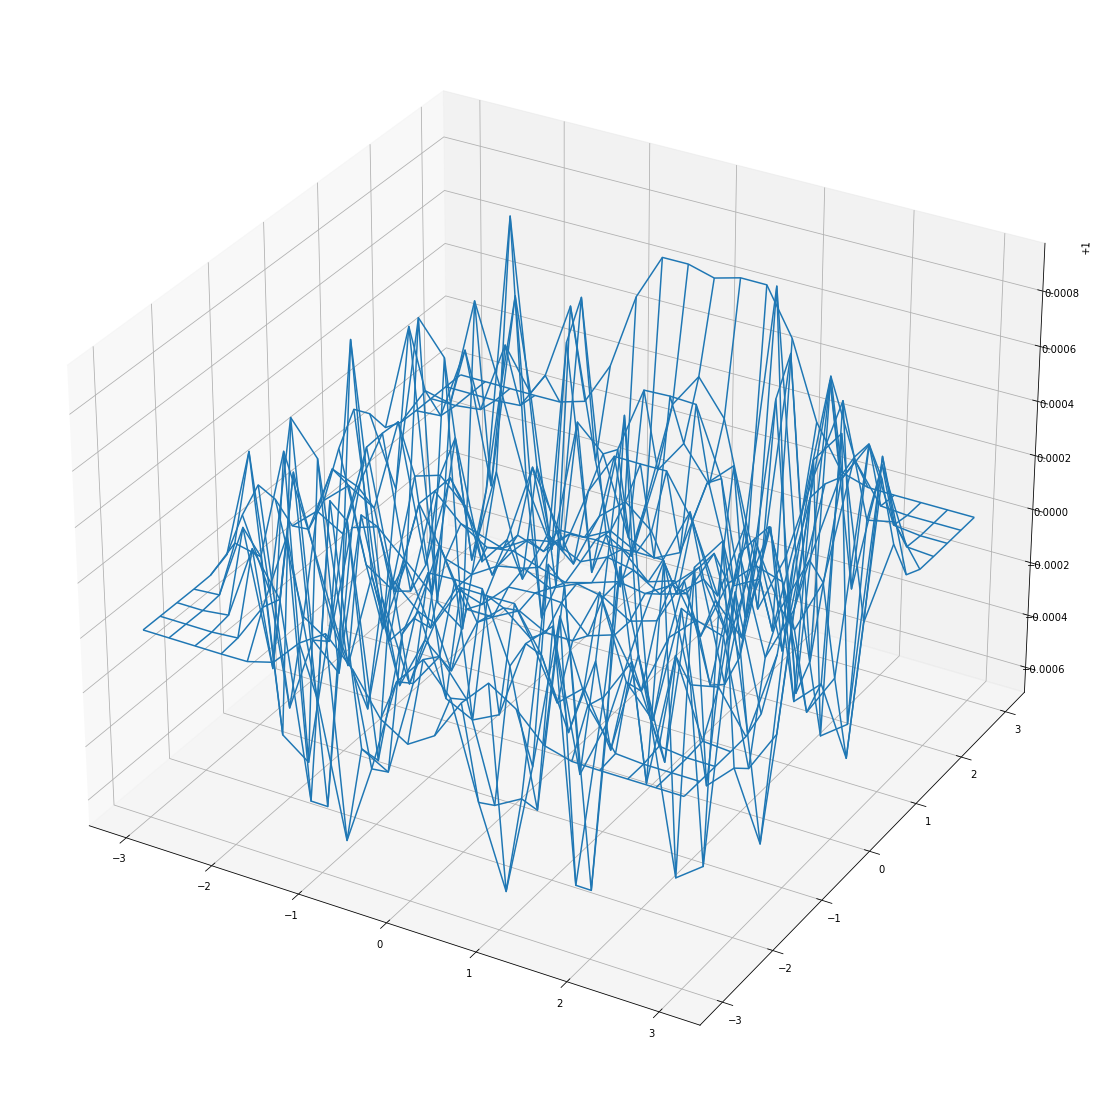

In [13]:
fig = plt.figure(figsize = (20,20))
ax = plt.axes(projection='3d')
s = ax.plot_wireframe(X_plot, Y_plot, hm_plot)

For longer time steps, both the euler explicit and leap frog case eventually result in instabilities.

## Staggered and Euler Explicit case